In [9]:
from datasets import load_dataset
from linguaf import descriptive_statistics as ds
from linguaf import syntactical_complexity as sc
from linguaf import lexical_diversity as ld
import textdescriptives as td
from transformers import pipeline
model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)
sentiment_task("T'estimo!")



d:\Anaconda\envs\chatGPT\Lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


TypeError: Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [ ]:
data = load_dataset("Hello-SimpleAI/HC3", "all", trust_remote_code=True)

In [2]:
tmp = data['train']['chatgpt_answers'][:1000]
chatgpt_document = [sentence for sublist in tmp for sentence in sublist]

In [3]:
tmp = data['train']['human_answers'][:1000]
human_document = [sentence for sublist in tmp for sentence in sublist]

In [4]:
print(f"chatgpt: {ds.avg_sentence_length(chatgpt_document)}")
print(f"human: {ds.avg_sentence_length(human_document)}")

chatgpt: 98.94742779783394
human: 78.79970862470863


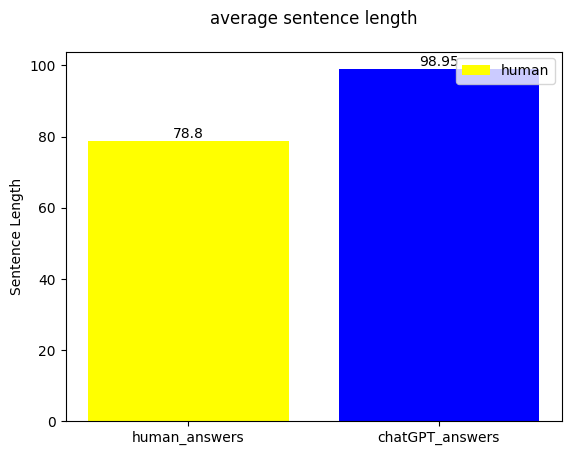

In [5]:
import matplotlib.pyplot as plt

# 数据
chatgpt_avg_length = ds.avg_sentence_length(chatgpt_document)
human_avg_length = ds.avg_sentence_length(human_document)

# 图表配置
labels = ['human_answers', 'chatGPT_answers']
values = [human_avg_length, chatgpt_avg_length]
colors = ['yellow', 'blue']

# 绘制柱状图
fig, ax = plt.subplots()

bars = ax.bar(labels, values, color=colors)

# 在柱子上方标注数值
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# 设置纵坐标标签
ax.set_ylabel('Sentence Length')

# 设置标题
plt.title('average sentence length', loc='center', pad=20)

# 显示图例
ax.legend(labels=['human', 'chatGPT'], loc='upper right')

# 显示图表
plt.show()

In [6]:
print(f"chatgpt: {sc.mean_dependency_distance(chatgpt_document)}")
print(f"human: {sc.mean_dependency_distance(human_document)}")

chatgpt: 2.7671641286337456
human: 3.016550793066355


In [7]:
print(f"chatgpt: {ld.lexical_density(chatgpt_document)}")
print(f"human: {ld.lexical_density(human_document)}")

chatgpt: 57.47458373144102
human: 59.712902721407545


In [10]:
help(sc)

Help on module linguaf.syntactical_complexity in linguaf:

NAME
    linguaf.syntactical_complexity

FUNCTIONS
    mean_dependency_distance(documents: list, lang: str = 'en') -> float
        Calculates Mean Dependency Distance score over a list of documents
        The higher the score the more complex are the sentences.
        
        Keyword arguments:
        documents -- the list of textual documents
        lang -- language of the textual documents

FILE
    /Users/zhangxiwen/miniconda3/envs/test/lib/python3.10/site-packages/linguaf/syntactical_complexity.py




In [5]:
ds.avg_sentence_length(document)

107.63636363636364

In [6]:
sc.mean_dependency_distance(document)

2.9041382922996335

In [8]:
ld.lexical_density(document)

58.83825738607912

In [14]:
data['train']['question'][:10]

['Why is every book I hear about a " NY Times # 1 Best Seller " ? ELI5 : Why is every book I hear about a " NY Times # 1 Best Seller " ? Should n\'t there only be one " # 1 " best seller ? Please explain like I\'m five.',
 "If salt is so bad for cars , why do we use it on the roads ? As the title states , why do we use it ? is there no other option or what ? Please explain like I'm five.",
 "Why do we still have SD TV channels when HD looks like SD on an old TV ? Could n't we just have the HD version of the channels & delete the SD ones ? Please explain like I'm five.",
 "Why has nobody assassinated Kim Jong - un He is such a pest and nuisance to basically the entire world except for China . Why has n't anyone had him assassinated yet ? Please explain like I'm five.",
 "How was airplane technology able to advance so quickly after the Wright Brothers ' first flight ? Mainly interested in how aviation was able to be deployed on a large scale during WWI . Please explain like I'm five.",
 

In [15]:
data['train']['human_answers'][:10]

[['Basically there are many categories of " Best Seller " . Replace " Best Seller " by something like " Oscars " and every " best seller " book is basically an " oscar - winning " book . May not have won the " Best film " , but even if you won the best director or best script , you \'re still an " oscar - winning " film . Same thing for best sellers . Also , IIRC the rankings change every week or something like that . Some you might not be best seller one week , but you may be the next week . I guess even if you do n\'t stay there for long , you still achieved the status . Hence , # 1 best seller .',
  "If you 're hearing about it , it 's because it was a very good or very well - publicized book ( or both ) , and almost every good or well - publicized book will be # 1 on the NY Times bestseller list for at least a little bit . Kindof like how almost every big or good movies are # 1 at the box office on their opening weekend .",
  "One reason is lots of catagories . However , how the NY

In [19]:
data['train']['chatgpt_answers'][:10]

[['There are many different best seller lists that are published by various organizations, and the New York Times is just one of them. The New York Times best seller list is a weekly list that ranks the best-selling books in the United States based on sales data from a number of different retailers. The list is published in the New York Times newspaper and is widely considered to be one of the most influential best seller lists in the book industry. \nIt\'s important to note that the New York Times best seller list is not the only best seller list out there, and there are many other lists that rank the top-selling books in different categories or in different countries. So it\'s possible that a book could be a best seller on one list but not on another. \nAdditionally, the term "best seller" is often used more broadly to refer to any book that is selling well, regardless of whether it is on a specific best seller list or not. So it\'s possible that you may hear about a book being a "be